# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | tegueste
Processing Record 3 of Set 1 | princeville
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | gaspe
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | abepura
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | tolanaro
Processing Record 10 of Set 1 | dhanera
Processing Record 11 of Set 1 | mugia
Processing Record 12 of Set 1 | port mathurin
Processing Record 13 of Set 1 | bodaybo
Processing Record 14 of Set 1 | luena
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | banda aceh
Processing Record 18 of Set 1 | vernon
Processing Record 19 of Set 1 | praia
Processing Record 20 of Set 1 | lihue
Processing Record 21 of Set 1 | loikaw
Processing Record 22 of Set 1 | al bawi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,5.01,95,100,18.87,TF,1727745335
1,tegueste,28.5167,-16.3167,19.81,87,75,7.72,ES,1727745336
2,princeville,45.7668,-61.2985,14.06,89,98,1.34,CA,1727745337
3,puerto natales,-51.7236,-72.4875,2.90,88,100,5.17,CL,1727745338
4,gaspe,48.8334,-64.4819,8.29,73,1,2.45,CA,1727745339


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.01,95,100,18.87,TF,1727745335
1,tegueste,28.5167,-16.3167,19.81,87,75,7.72,ES,1727745336
2,princeville,45.7668,-61.2985,14.06,89,98,1.34,CA,1727745337
3,puerto natales,-51.7236,-72.4875,2.90,88,100,5.17,CL,1727745338
4,gaspe,48.8334,-64.4819,8.29,73,1,2.45,CA,1727745339


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

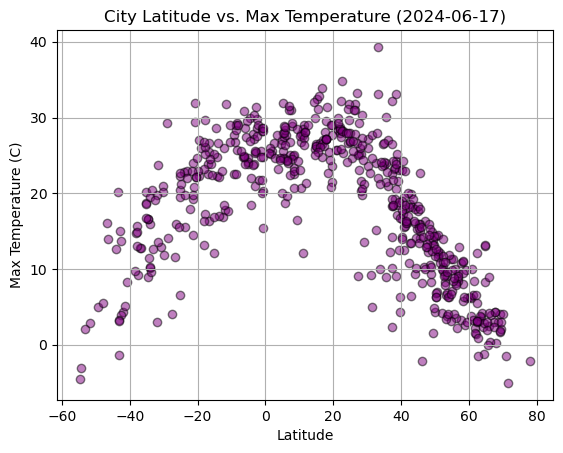

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df["Max Temp"], marker='o', color='purple', alpha=0.5, edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

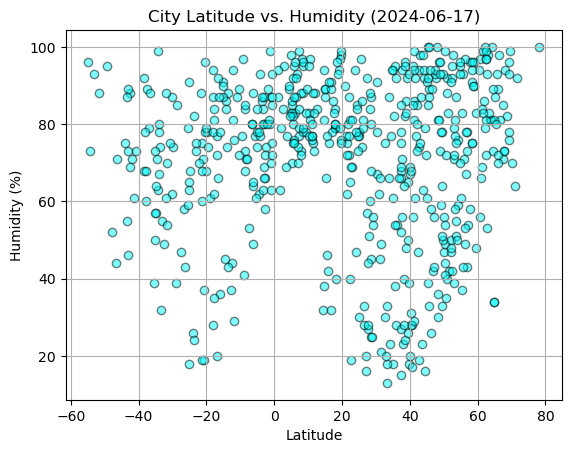

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df["Humidity"], marker='o', color='aqua', alpha=0.5, edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

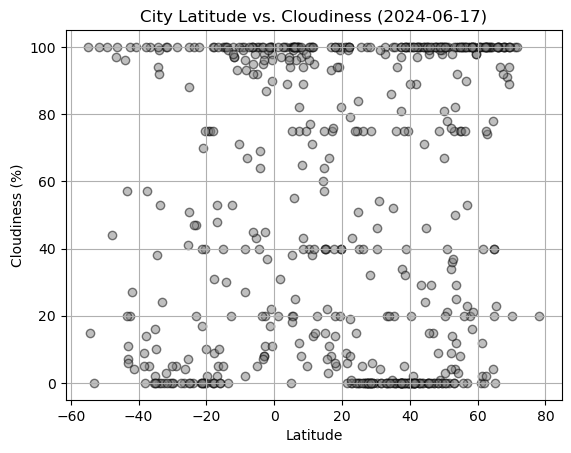

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df["Cloudiness"], marker='o', color='gray', alpha=0.5, edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

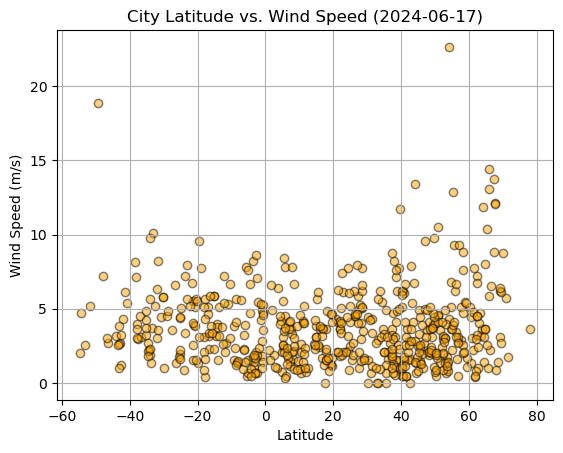

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df["Wind Speed"], marker='o', color='orange', alpha=0.5, edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def create_scatter_plot(x,y, title, xlabel, ylabel):
    #Scatter plot
    plt.scatter(x,y)
    
    # Perform linear regression
    (slope, intercept, r_value, pvalue, stderr) = linregress(x,y)
    
    # Create the regression line
    line = slope * x + intercept
    plt.plot(x, line, color='red', label='y={:.2f}x+{:.2f}, r²={:.2f}'.format(slope, intercept, r_value**2))
    
    # Add title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tegueste,28.5167,-16.3167,19.81,87,75,7.72,ES,1727745336
2,princeville,45.7668,-61.2985,14.06,89,98,1.34,CA,1727745337
4,gaspe,48.8334,-64.4819,8.29,73,1,2.45,CA,1727745339
6,bilibino,68.0546,166.4372,0.21,94,100,0.86,RU,1727745343
8,dhanera,24.5167,72.0167,26.66,85,0,2.16,IN,1727745345


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.01,95,100,18.87,TF,1727745335
3,puerto natales,-51.7236,-72.4875,2.90,88,100,5.17,CL,1727745338
5,abepura,-2.6333,140.5833,31.45,58,20,2.06,ID,1727745342
7,tolanaro,-25.0319,46.9987,20.47,91,88,4.39,MG,1727745344
10,port mathurin,-19.6833,63.4167,22.33,78,2,9.59,MU,1727745347


###  Temperature vs. Latitude Linear Regression Plot

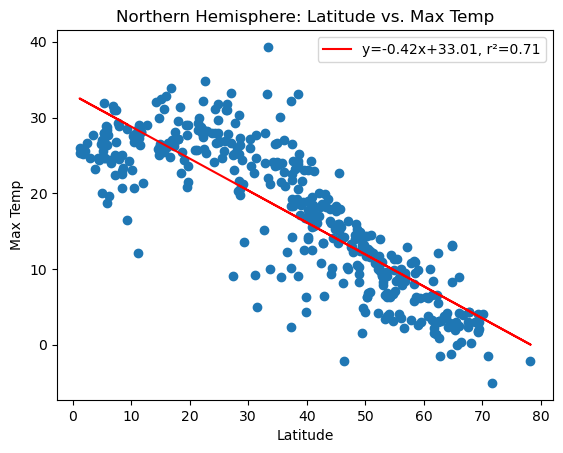

In [15]:
# Linear regression on Northern Hemisphere
create_scatter_plot(northern_hemi_df['Lat'] ,northern_hemi_df['Max Temp'], 'Northern Hemisphere: Latitude vs. Max Temp', 'Latitude', 'Max Temp')

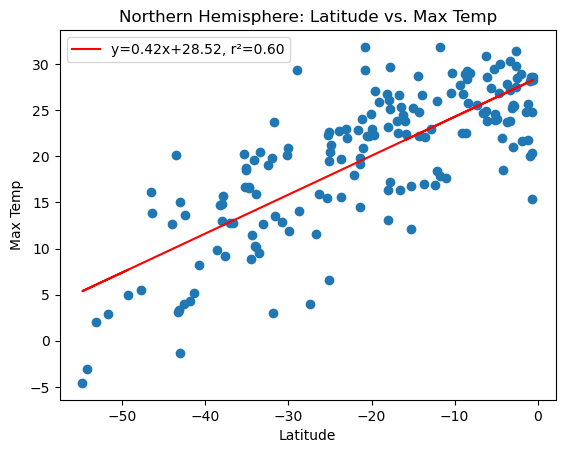

In [16]:
# Linear regression on Southern Hemisphere
create_scatter_plot(southern_hemi_df['Lat'] ,southern_hemi_df['Max Temp'], 'Northern Hemisphere: Latitude vs. Max Temp', 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

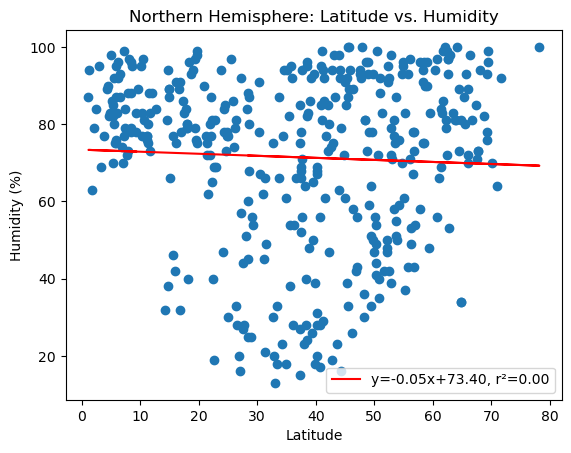

In [17]:
# Northern Hemisphere
create_scatter_plot(northern_hemi_df['Lat'] ,northern_hemi_df['Humidity'], 'Northern Hemisphere: Latitude vs. Humidity', 'Latitude', 'Humidity (%)')

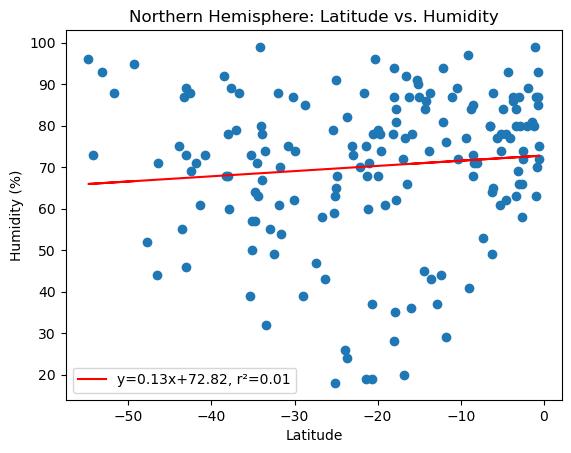

In [18]:
# Southern Hemisphere
create_scatter_plot(southern_hemi_df['Lat'] ,southern_hemi_df['Humidity'], 'Northern Hemisphere: Latitude vs. Humidity', 'Latitude', 'Humidity (%)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

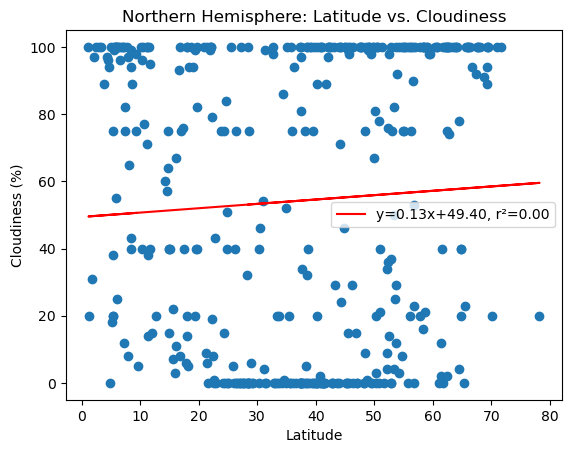

In [19]:
# Northern Hemisphere
create_scatter_plot(northern_hemi_df['Lat'] ,northern_hemi_df['Cloudiness'], 'Northern Hemisphere: Latitude vs. Cloudiness', 'Latitude', 'Cloudiness (%)')

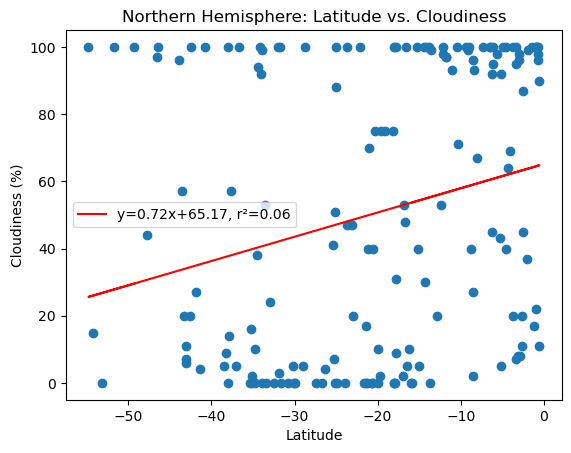

In [20]:
# Southern Hemisphere
create_scatter_plot(southern_hemi_df['Lat'] ,southern_hemi_df['Cloudiness'], 'Northern Hemisphere: Latitude vs. Cloudiness', 'Latitude', 'Cloudiness (%)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

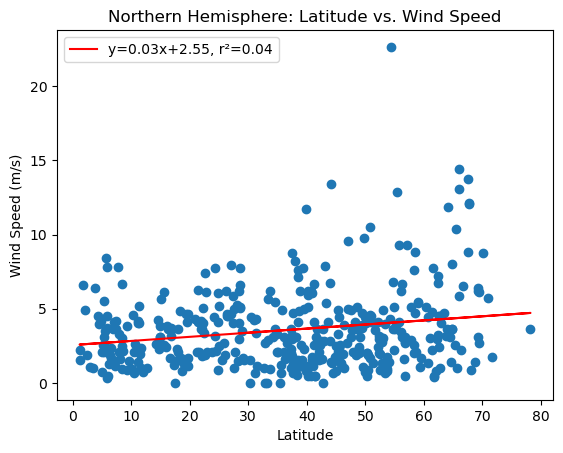

In [21]:
# Northern Hemisphere
create_scatter_plot(northern_hemi_df['Lat'] ,northern_hemi_df['Wind Speed'], 'Northern Hemisphere: Latitude vs. Wind Speed', 'Latitude', 'Wind Speed (m/s)')

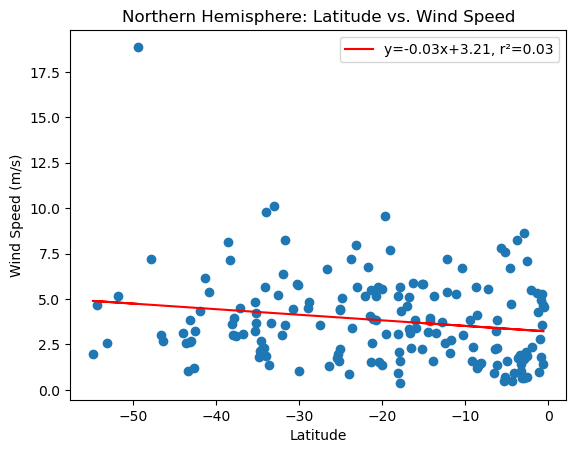

In [22]:
# Southern Hemisphere
create_scatter_plot(southern_hemi_df['Lat'] ,southern_hemi_df['Wind Speed'], 'Northern Hemisphere: Latitude vs. Wind Speed', 'Latitude', 'Wind Speed (m/s)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE